池化层  
池化运算：对信号进行"收集"并"总结"，类似水池收集水资源，因而得名池化层。  
"收集"：多变少 "总结"：最大值/平均值  

In [7]:
import os
import torch
import random
import numpy as np
import torchvision
import torch.nn as nn
from torchvision import transforms
from matplotlib import pyplot as plt
from PIL import Image
from pytorch_code.lesson3.tools.transform_invert import set_seed, transform_invert
set_seed(1)
path_img = os.path.join(os.getcwd(), 'pytorch_code', 'lesson3', "lena.png")
img = Image.open(path_img).convert('RGB')

img_transfrom = transforms.Compose([transforms.ToTensor()])
img_tensor = img_transfrom(img)
img_tensor.unsqueeze_(dim=0)

tensor([[[[0.8824, 0.8824, 0.8824,  ..., 0.8941, 0.8549, 0.7961],
          [0.8784, 0.8824, 0.8784,  ..., 0.9059, 0.8588, 0.7922],
          [0.8824, 0.8784, 0.8784,  ..., 0.9137, 0.8667, 0.7765],
          ...,
          [0.3216, 0.3098, 0.3686,  ..., 0.6863, 0.6824, 0.6824],
          [0.3216, 0.3137, 0.3843,  ..., 0.7059, 0.7137, 0.7059],
          [0.3255, 0.3176, 0.3882,  ..., 0.7020, 0.7216, 0.7216]],

         [[0.5412, 0.5333, 0.5333,  ..., 0.5843, 0.5176, 0.3922],
          [0.5333, 0.5333, 0.5333,  ..., 0.5882, 0.5216, 0.3922],
          [0.5373, 0.5373, 0.5373,  ..., 0.5765, 0.5098, 0.3804],
          ...,
          [0.0863, 0.0706, 0.1176,  ..., 0.2706, 0.2588, 0.2588],
          [0.0863, 0.0745, 0.1333,  ..., 0.2745, 0.2824, 0.2863],
          [0.0902, 0.0784, 0.1373,  ..., 0.2667, 0.2941, 0.2941]],

         [[0.4745, 0.5020, 0.5176,  ..., 0.4627, 0.4196, 0.3333],
          [0.4784, 0.5020, 0.5176,  ..., 0.4745, 0.4314, 0.3451],
          [0.4902, 0.5020, 0.5098,  ..., 0

nn.MaxPool2d  
功能：对二维信号（图像）进行最大值池化  
主要参数：  
* kernel_size:池化核尺寸  
* stride:步长  
* padding:填充个数  
* dilation:池化核间隔大小  
* ceil_mode:尺寸向上取整  
* return_indices:记录池化像素索引

In [2]:
maxpool_layer = nn.MaxPool2d((2, 2), stride=(2, 2))
img_pool = maxpool_layer(img_tensor)

In [3]:
img_tensor.shape, img_pool.shape

(torch.Size([1, 3, 512, 512]), torch.Size([1, 3, 256, 256]))

In [4]:
img_pool = transform_invert(img_pool[0, 0:3, ...], img_transfrom)
img_raw = transform_invert(img_tensor.squeeze(), img_transfrom)
plt.subplot(122).imshow(img_pool)
plt.subplot(121).imshow(img_raw)
plt.show()

nn.AvgPool2d  
功能：对二维信号（图像）进行平均值池化  
主要参数：  
* kernel_size:池化核尺寸  
* stride:步长  
* padding:填充个数  
* ceil_mode:尺寸向上取整  
* count_include_pad:填充值用于计算  
* divisor override:除法因子

In [7]:
avgpool_layer = nn.AvgPool2d((2, 2), stride=(2, 2))
img_pool = avgpool_layer(img_tensor)

In [8]:
img_tensor.shape, img_pool.shape

(torch.Size([1, 3, 512, 512]), torch.Size([1, 3, 256, 256]))

In [9]:
img_pool = transform_invert(img_pool[0, 0:3, ...], img_transfrom)
img_raw = transform_invert(img_tensor.squeeze(), img_transfrom)
plt.subplot(122).imshow(img_pool)
plt.subplot(121).imshow(img_raw)
plt.show()

In [3]:
img_tensor = torch.ones((1, 1, 4, 4))
avgpool_layer = nn.AvgPool2d((2, 2), stride=(2, 2), divisor_override=3)
img_pool = avgpool_layer(img_tensor)

In [14]:
img_tensor, img_pool, img_tensor.shape, img_pool.shape

(tensor([[[[1., 1., 1., 1.],
           [1., 1., 1., 1.],
           [1., 1., 1., 1.],
           [1., 1., 1., 1.]]]]),
 tensor([[[[1.3333, 1.3333],
           [1.3333, 1.3333]]]]),
 torch.Size([1, 1, 4, 4]),
 torch.Size([1, 1, 2, 2]))

nn.MaxUnpool2d  
功能：对二维信号（图像）进行最大值池化上采样  
主要参数：  
* kernel_size:池化核尺寸  
* stride:步长  
* padding:填充个数

In [8]:
img_tensor = torch.randint(high=5, size=(1, 1, 4, 4), dtype=torch.float)
maxpool_layer = nn.MaxPool2d((2, 2), stride=(2, 2), return_indices=True)
img_pool, indices = maxpool_layer(img_tensor)
img_reconstruct = torch.randn_like(img_pool, dtype=torch.float)
maxunpool_layer = nn.MaxUnpool2d((2, 2), stride=(2, 2))
img_unpool = maxunpool_layer(img_reconstruct, indices)

In [9]:
img_tensor, img_pool, img_reconstruct, img_unpool

(tensor([[[[0., 4., 4., 3.],
           [3., 3., 1., 1.],
           [4., 2., 3., 4.],
           [1., 3., 3., 0.]]]]),
 tensor([[[[4., 4.],
           [4., 4.]]]]),
 tensor([[[[-1.0276, -0.5631],
           [-0.8923, -0.0583]]]]),
 tensor([[[[ 0.0000, -1.0276, -0.5631,  0.0000],
           [ 0.0000,  0.0000,  0.0000,  0.0000],
           [-0.8923,  0.0000,  0.0000, -0.0583],
           [ 0.0000,  0.0000,  0.0000,  0.0000]]]]))

线性层又称全连接层，其每个神经元与上一层所有神经元相连实现对前一层的线性组合，线性变换  
nn.Linear  
功能：对一维信号（向量）进行线性组合  
主要参数：  
* in_features:输入结点数  
* out_features:输出结点数  
* bias:是否需要偏置  


In [17]:
inputs = torch.tensor([[1., 2, 3]])
linear_layer = nn.Linear(3, 4)
linear_layer.weight.data = torch.tensor([[1., 1., 1.],
                                         [2., 2., 2.],
                                         [3., 3., 3.],
                                         [4., 4., 4.]])
linear_layer.bias.data.fill_(0.5)
output = linear_layer(inputs)

In [18]:
inputs, inputs.shape, linear_layer.weight.data, linear_layer.weight.data.shape, output, output.shape

(tensor([[1., 2., 3.]]),
 torch.Size([1, 3]),
 tensor([[1., 1., 1.],
         [2., 2., 2.],
         [3., 3., 3.],
         [4., 4., 4.]]),
 torch.Size([4, 3]),
 tensor([[ 6.5000, 12.5000, 18.5000, 24.5000]], grad_fn=<AddmmBackward>),
 torch.Size([1, 4]))

nn.Sigmoid  
特性：  
* 输出值在（0，1），符合概率  
* 导数范围是[0, 0.25],易导致梯度消失  
* 输出为非0均值，破坏数据分布  


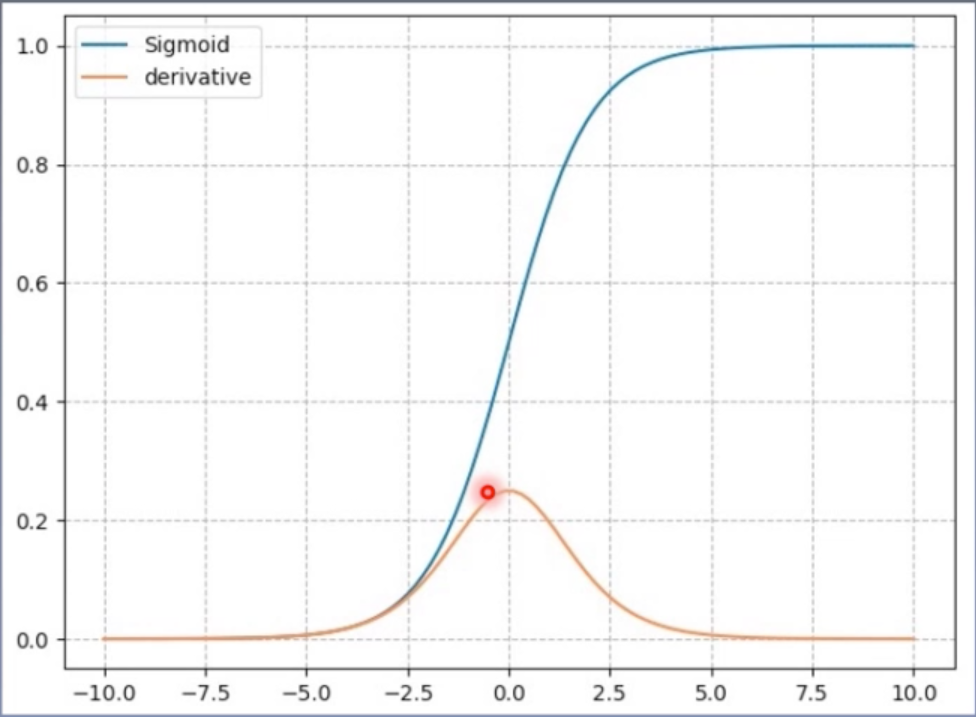

In [10]:
from IPython.display import Image
Image(filename= '/Users/chenmengda/深度之眼/pytorch/pytorch_code/lesson3/sigmoid.png')

nn.tanh  
特性：
* 输出值在(-1,1),数据符合0均值  
* 导数范围是(0, 1),易导致梯度消失

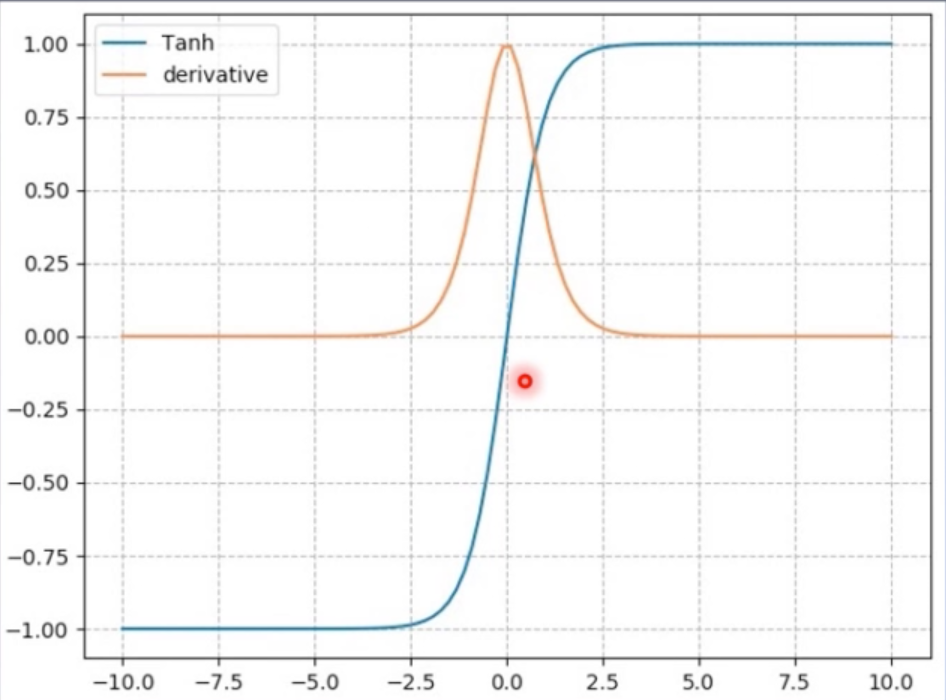

In [12]:
Image(filename= '/Users/chenmengda/深度之眼/pytorch/pytorch_code/lesson3/tanh.png')

nn.ReLU  
特性：  
* 输出值均为正数，负半轴导致死神经元  
* 导数是1，缓解梯度消失，但易引发梯度爆炸

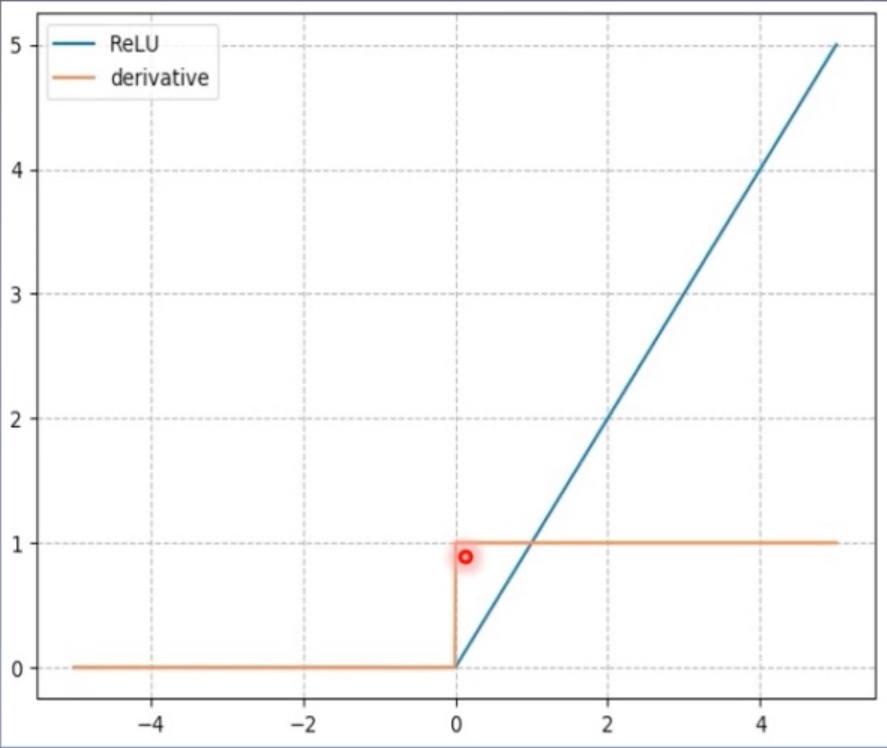

In [13]:
Image(filename= '/Users/chenmengda/深度之眼/pytorch/pytorch_code/lesson3/relu.png')

nn.LeakyReLU  
* negative_slope:负半轴斜率  
nn.PReLU  
* init:可学习斜率  
nn.RReLU  
* lower:均匀分布下限  
* upper:均匀分布上限

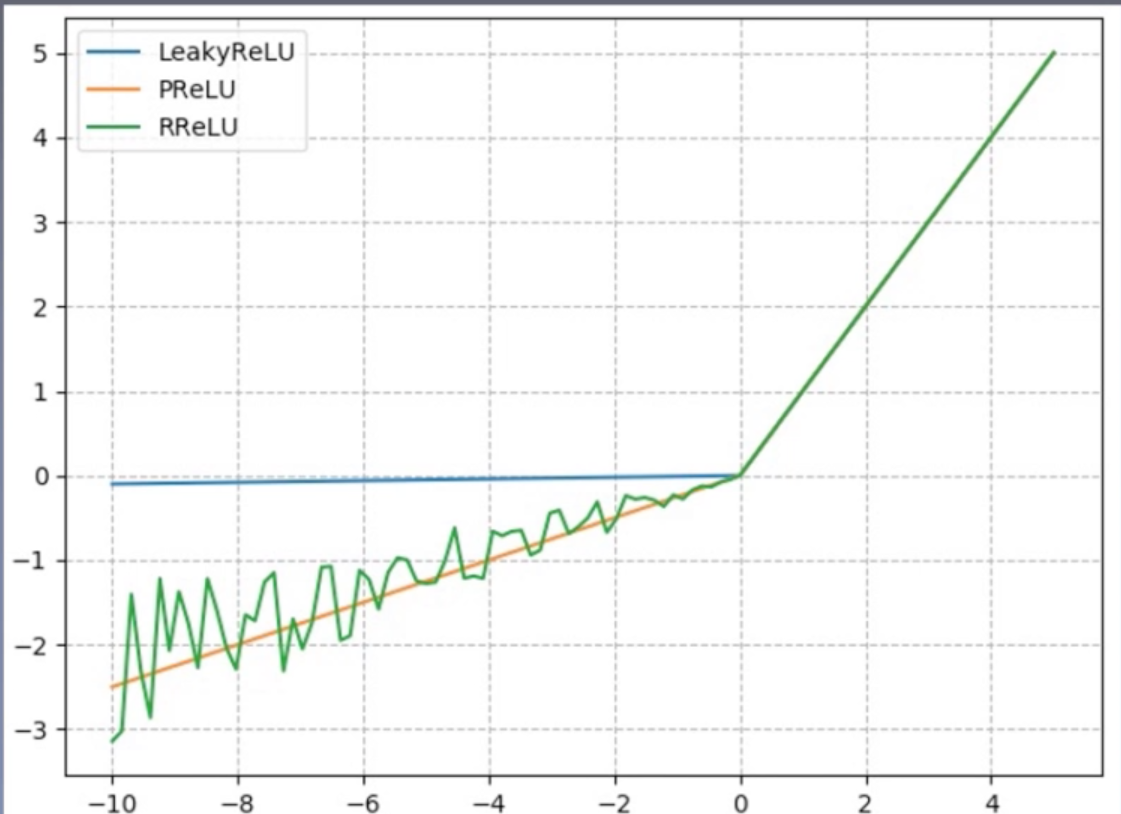

In [14]:
Image(filename= '/Users/chenmengda/深度之眼/pytorch/pytorch_code/lesson3/other_Relu.png')